# Setting enviroment

In [2]:
%load_ext kedro.ipython

[12/25/24 15:29:09] INFO     Using                                                                  ]8;id=451224;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=945895;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/home/bruno/Documents/Programming/Programming_projects/olist_project/                
                             .venv/lib/python3.11/site-packages/kedro/framework/project/rich_loggin                
                             g.yml' as logging configuration.                                                      

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=130897;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=652492;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#61\61]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=17567;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=367636;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Resolved project path as:                                              ]8;id=11873;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=497184;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#178\178]8;;\
                             /home/bruno/Documents/Programming/Programming_projects/olist_project.                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/25/24 15:29:10] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=449671;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=976469;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project olist_project                                            ]8;id=979434;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=310490;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=614686;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=592219;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#145\145]8;;\
                             'pipelines'                                                                           

[12/25/24 15:29:11] INFO     Registered line magic 'run_viz'                                        ]8;id=624737;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=639444;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#151\151]8;;\

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load data

In [4]:
df_orders = catalog.load("pre_orders")

[12/25/24 15:29:12] INFO     Loading data from pre_orders (ParquetDataset)...                   ]8;id=200008;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=932280;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

In [6]:
df_orders

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,cohort_info
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3504c0cb71d7fa48d967e0e4c94d59d9,201710
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,289cdb325fb7e7f891c38608bf9e0962,201807
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,4869f7a5dfa277a7dca6462dcf3b52b2,201808
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,66922902710d126a0e7d26b0e3805106,201711
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2c9e548be18521d1c43cde1c582c6de8,201802
...,...,...,...,...,...,...,...,...,...
100005,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,e24fc9fcd865784fb25705606fe3dfe7,201703
100006,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1f9ab4708f3056ede07124aad39a2554,201802
100007,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,d50d79cb34e38265a8649c383dcffd48,201708
100008,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,a1043bafd471dff536d0c462352beb48,201801


In [124]:
def months_between_cohort(cohort_1,cohort_2):
    dt_cohort_1 = pd.to_datetime(cohort_1.astype('string'),format='%Y%m')
    dt_cohort_2 = pd.to_datetime(cohort_2.astype('string'),format='%Y%m')
    return (dt_cohort_2.dt.to_period('M').astype(int) - dt_cohort_1.dt.to_period('M').astype(int))
df_time_between_activities = (
    df_orders
    .query('order_status=="delivered"')
    .filter(['seller_id','order_purchase_timestamp','cohort_info'])
    .sort_values(['order_purchase_timestamp'])
    .assign(
        first_cohort_seller=lambda df: df.groupby('seller_id').cohort_info.transform('min'),
        months_bt = lambda df: months_between_cohort(df.first_cohort_seller,df.cohort_info),
        post_order_purchase_timestamp = lambda df: df.groupby('seller_id')['order_purchase_timestamp'].shift(-1).fillna(df.order_purchase_timestamp.max()),
        inactivity_time = lambda df: (df.post_order_purchase_timestamp-df.order_purchase_timestamp).dt.days,
    )
)
df_time_between_activities

,seller_id,order_purchase_timestamp,cohort_info,first_cohort_seller,months_bt,post_order_purchase_timestamp,inactivity_time
30891,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-15 12:16:38,201609,201609,0,2016-10-04 13:30:13,19
93822,522620dcb18a6b31cd7bdf73665113a9,2016-10-03 09:44:50,201610,201610,0,2016-10-05 20:09:05,2
28587,f09b760d23495ac9a7e00d29b769007c,2016-10-03 16:56:50,201610,201610,0,2018-08-29 15:00:37,694
98542,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-03 21:13:36,201610,201610,0,2017-01-25 16:57:30,113
88962,cca3071e3e9bb7d12640c9fbe2301306,2016-10-03 22:06:03,201610,201610,0,2016-10-03 22:51:30,0
...,...,...,...,...,...,...,...
99939,5f2684dab12e59f83bef73ae57724e45,2018-08-29 12:25:59,201808,201701,19,2018-08-29 15:00:37,0
30253,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-29 14:18:23,201808,201709,11,2018-08-29 15:00:37,0
31673,2a84855fd20af891be03bc5924d2b453,2018-08-29 14:18:28,201808,201712,8,2018-08-29 15:00:37,0
70081,7d7866a99a8656a42c7ff6352a433410,2018-08-29 14:52:00,201808,201807,1,2018-08-29 15:00:37,0


In [125]:
# é notvável que apenas em 201701 começa a ter um entrada mais estável de
df_time_between_activities.first_cohort_seller.value_counts().sort_index()


first_cohort_seller
201609       12
201610    10684
201612       33
201701    14874
201702    13218
201703     8568
201704     4959
201705     5086
201706     1220
201707     7235
201708     3949
201709     3098
201710     5696
201711     3988
201712     1909
201801     3295
201802     2164
201803     1303
201804     2372
201805     1723
201806     1173
201807      809
201808      451
Name: count, dtype: Int64

<Axes: xlabel='months_bt', ylabel='cum_volume'>

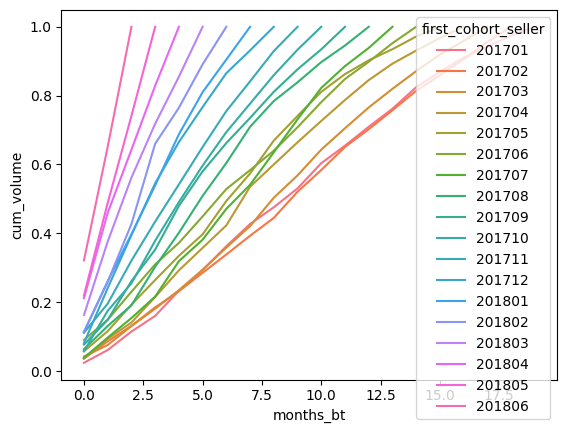

In [75]:
df_aux = (
    df_time_between_activities
    .query('(first_cohort_seller>=201701)&(first_cohort_seller<=201806)')
    .sort_values(['first_cohort_seller','months_bt'])
    .groupby(['first_cohort_seller','months_bt'], as_index=False)
    .agg(
        volume = ('first_cohort_seller','count'),
    )
    .assign(
        cum_volume = lambda df: df.groupby('first_cohort_seller').volume.transform('cumsum')/df.groupby('first_cohort_seller').volume.transform('sum')
    )
    .astype({"first_cohort_seller":"string","months_bt":"int","volume":"int","cum_volume":"float"})
)
sns.lineplot(data=df_aux, x="months_bt", y='cum_volume', hue="first_cohort_seller",)

<Axes: xlabel='limit'>

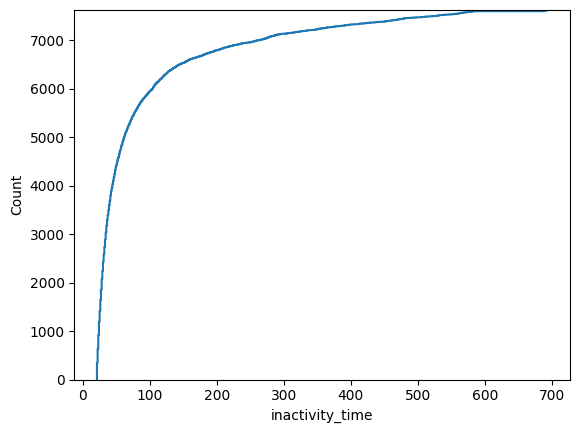

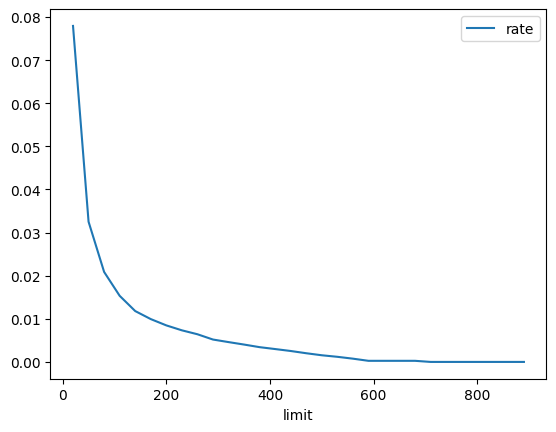

In [159]:
rates = []
inf_lim = 20
limits = list(range(inf_lim,900,30))
sns.ecdfplot(data=df_time_between_activities.query(f'inactivity_time>{inf_lim}'),x="inactivity_time",stat='count')
for i,limit in enumerate(limits):
    n_sell = (df_time_between_activities.inactivity_time>limit).mean()
    rates.append(n_sell)
pd.DataFrame({'limit':limits,'rate': rates}).plot(x='limit',y='rate')

In [144]:
(
    df_time_between_activities
    .query('order_purchase_timestamp<"2018-02-01"')
    .sort_values('inactivity_time',ascending=False)
    .reset_index(drop=True)
    .dropna(subset=['inactivity_time'])
    .assign(
        cum_vol = lambda df: pd.Series([1]*len(df)).cumsum(),
        faixas = lambda df: pd.cut(df.inactivity_time, bins=[-1,15,30,60,90,120,150,
                                                             180,210,
                                                             df.inactivity_time.max()+1])
    )
    .groupby('faixas', observed=False, as_index=False).cum_vol.max()
    .assign(
        post_vol = lambda df: df.cum_vol.shift(-1),
        recovery = lambda df: (df.cum_vol - df.post_vol)/df.cum_vol,
        advance = lambda df: 1-df.recovery,
    )
)

,faixas,cum_vol,post_vol,recovery,advance
0,"(-1, 15]",51379,5190.0,0.898986,0.101014
1,"(15, 30]",5190,2990.0,0.423892,0.576108
2,"(30, 60]",2990,1701.0,0.431104,0.568896
3,"(60, 90]",1701,1262.0,0.258083,0.741917
4,"(90, 120]",1262,1022.0,0.190174,0.809826
5,"(120, 150]",1022,903.0,0.116438,0.883562
6,"(150, 180]",903,832.0,0.078627,0.921373
7,"(180, 210]",832,784.0,0.057692,0.942308
8,"(210, 695]",784,NaN,NaN,NaN


<Axes: xlabel='inactivity_time', ylabel='Proportion'>

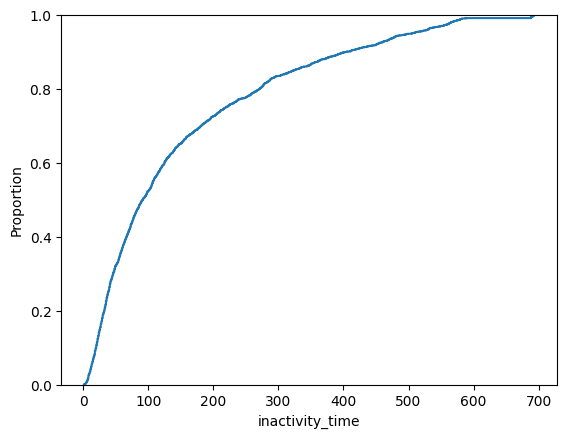

In [142]:
df_aux = (
    df_time_between_activities
    .groupby('seller_id', as_index=False)
    .inactivity_time.max()
)
sns.ecdfplot(data=df_aux,x="inactivity_time")

<Axes: xlabel='limit'>

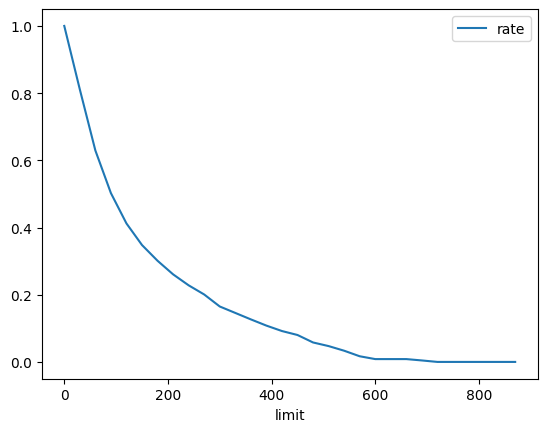

In [130]:
rates = []
limits = list(range(0,900,30))
for i,limit in enumerate(limits):
    n_sell = (df_aux.inactivity_time>limit).mean()
    rates.append(n_sell)
pd.DataFrame({'limit':limits,'rate': rates}).plot(x='limit',y='rate')

In [ ]:
# depois de x dias sem vender quantos % voltam a vender?